# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File 'airline_passengers.csv' already there; not retrieving.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pmdarima as pm

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

# Model with AutoARIMA

In [21]:
# Function calculating RMSE
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

## Normal Model

In [13]:
model = pm.auto_arima(
    train['Passengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=True, # use seasonal ARIMA
    m=12, # seasonality is 12 months
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.27 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.21 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [14]:
model.summary() # print model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 26 Feb 2023   AIC                            905.686
Time:                                    11:25:24   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

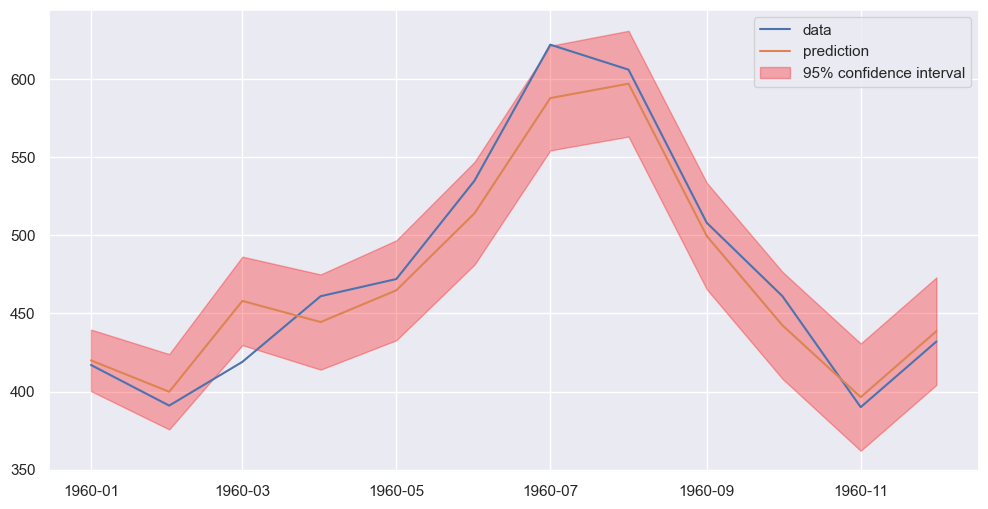

In [16]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['Passengers'], test_pred))

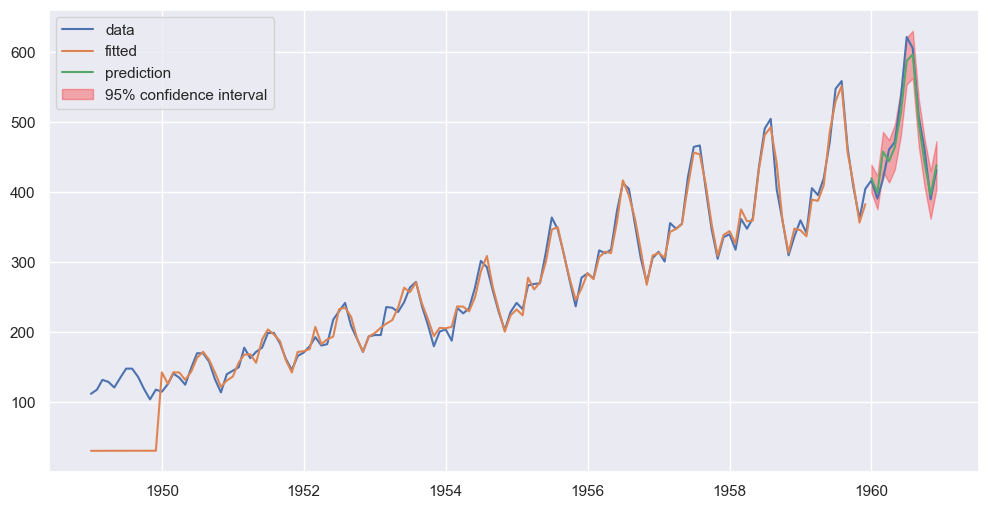

In [20]:
train_pred = model.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()

## LogModel

In [ ]:
logModel = pm.auto_arima(
    train['LogPassengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=True, # use seasonal ARIMA
    m=12, # seasonality is 12 months
)

In [ ]:
logModel.summary() # print model summary

In [ ]:
test_pred, confint = logModel.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['LogPassengers'], test_pred))

train_pred = logModel.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()